**Chapter 4 Questionnaire**

1) How is a grayscale image represented on a computer? How about a color image?
For a greyscale image, every pixel is a number where white corresponds to 0 and fully back corresponds to 255
For a color image, every pixel is represented by 3 values on 3 arrays of the same size. They are Red, Green and Blue (RGB)

2) How are the files and folders in the MNIST_SAMPLE dataset structured? Why?
There is one folder for the Train samples and one folder for the Validation/Test samples. The subfolders are split based on the number the pictures correspond to, so the subfolder 'threes' contains all the images of 3. 
This separation helps for creating the target variables and for separating Train and Test data.

3) Explain how the "pixel similarity" approach to classifying digits work
The first part of the pixel similarity approach is to create the "average three" and the "average seven". Each pixel value of these averages corresponds to the mean of all the values of this particular pixel from all threes (or all sevens respectively). This is what we compare against in the classifier. 

The second part consists of establishing a measure of distance between the picture at hand and the average three (or the average seven). This is done by taking the mean of either the absolute difference of each pixel or of the squared difference of each pixel. 

After establishing the distance of the picture at hand from the averages, the classifier picks the value that is the smallest, that is if the distance of the test picture is smaller from the "average three" than it is from the "average seven" then the classifier selects 3 as its guess.

4) What is a list comprehension? Create one now that selects odd numbers from a list and doubles them
A list comprehension is a python operation that allows operations to be performed on each element of a list in a compactly written form

In [1]:
my_list = list(range(30))
[x*2 for x in my_list if x%2 != 0]

[2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58]

5) What is a rank 3 tensor?
A rank 3 tensor is a tensor that has 3 dimensions or axes. When running tensor.shape this should return 3 numbers

6) What is the difference between tensor rank and shape? How do you get the rank from the shape? 
The shape of a tensor tells the user how many entries correspond to each dimension of the tensor. For example a tensor that has a shape 3,7,4 is essentially a 3 dimensional matrix with 4 entries available in the first dimension, 7 entries for the second and 3 for the 3rd. The three numbers that are returned via the tensor.shape attribute correspond to the rank of the tensor.

7) What are RMSE and L1 norm?
RMSE stands for root mean squared error and as the name suggests takes the error between prediction and target squares it, averages it and then takes the square root. It is also called the L2 norm.
L1 norm is the mean of the absolute value of the difference between prediction and target. 

8) How can you apply a calculation on thousands of numbers at once, many thousands of times faster than a Python loop? 
By using broadcasting. Python computes elementwise calculations very fast in an efficient manner in C. Broadcasting works in two scenarios:
a) One of the two dimensions that differ are equal to 1 and this one is "streched" to match the other one
b) The dimension is missing completely

In [2]:
import torch
M_data = [[1., 2., 3.], [4., 5., 6]]
M = torch.tensor(M_data)
M.shape
(M-1).shape
# Here the following changes happened to the tensors:
# 1 which is a tensor with dimensions (1) was stretched initially to match the first dimension of the M tensor (3)
# As there is no second dimension for 1 it was just "copied" as many times as needed
M2 = torch.tensor([[1,2], [4,6]])
M2.shape
#M + M2 This does not work as the dimensions are not aligned 
M3 = torch.tensor([[4], [2], [1]])
M3.shape

M4 = torch.tensor([1,1,1]).unsqueeze(0)
M4.shape
M3 + M4

# Here what happened is the following: M3 has a shape of (3,1) and M4 has a shape of (1,3).
# Starting from the 1st dimension M3 was expanded to have 3 columns so it became [[4,4,4], [2,2,2], [1,1,1]]
# For the 2nd dimension M4 was expanded to have 3 rows so [[1,1,1], [1,1,1], [1,1,1]]

tensor([[5, 5, 5],
        [3, 3, 3],
        [2, 2, 2]])

9) Create a 3x3 tensor or array containing the numbers from 1 to 9. Double it. Select the bottom-right four numbers

In [5]:
myt = torch.tensor(range(1,10)).view(3,3)
myt[1:, 1:]

tensor([[5, 6],
        [8, 9]])

10) What is broadcasting? (See question 8)

11) Are metrics generaly calculated using the training set or the validation set? Why?
In general the validation set is used for the calculation of metrics. The reasoning is that the training set is used for finetuning weights/parameters and therefore using the metrics on the train set can lead the model to overfit.

12) What is SGD?
SGD stands for Stochastic Gradient Descent. The main difference between GD and SGD is that a single round of updating parameters in GD requires the gradient to be calculated on the full train dataset, while in SGD the updates are done incrementally based on batches where the gradient is being calculated. This results in faster improvements in the parameters and can overall be faster than GD. The drawback is that getting to the optimal point might not be so smooth and it could sometimes get stuck.

13) Why does SGD use mini-batches?
Mini-batches are the compromise struck between using the full dataset (GD) which is slow, and using a single training example for updating the parameters, which might not be reflective of the correct direction the parameters should take or it might be too steep. Using a number of observations that is smaller than the total dataset but larger than a single observation is fast and gets us in the right direction in terms of optimization. 

14) What are the seven steps in SGD for machine learning?
- Initialise the parameters
- Make predictions
- Calculate loss
- Calculate gradients
- Update parameters
- Repeat
- Stop

15) How do we initialize the weights in a model?
If no previous model is available for this task, just randomly and without using the same number for all the weights.
Otherwise, we can use a pre-trained model for some of the weights (not the last layer usually as the pre-trained models were used for a different task)

16) What is loss?
Loss is a metric which quantifies how far our predictions are from the target we are aiming to achieve.

17) Why can't we always use a higher learning rate?
In some situations a higher learning rate can lead the model to diverge and move away from the optimal point. 

18) What is a gradient?
Gradient is value of the derivative function at a specific point. We use the gradient of the loss function with respect to the parameters in order to understand the direction we have to push our parameters to. If the gradient is positive we push in the negative the direction for example, as we want the loss to become smaller.

19) Do you need to know how to calculate gradinets yourself?
No, as PyTorch does it for you.

20) Why can't we use accuracy as a loss function?
The loss function has to be a function that responds positively or negatively to small changes in the weights of the model. Accuracy is not such a function. In order for the accuracy to change our prediction for the training example has to change significantly. 
For example: In the MNIST_SAMPLE case the training examples are classified to 3 or 7 based on whether the prediction on them is above or below 0. A wrong prediction (a 3 classified as 7) will have a value negative value associated with it (let's say -7). If we change the weights so that the prediction in this training example moves in the correct direction (positive) and this results in a new value of -5, the accuracy will not change despite the fact that we are making progress.

21) Draw the sigmoid function. What is so special about its shape?
The shape of the sigmoid is very smooth (good for derivatives) and it also restricts the values between 0 and 1

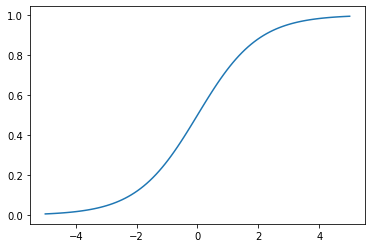

In [13]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x): return 1/(1+torch.exp(-x))
x = np.linspace(-5,5,100)
y = sigmoid(torch.tensor(x))
plt.plot(x, y)


22) What is the difference between a loss function and a metric?
A loss function is a function used for the model to update the parameters incrementally. On the other hand a metric is a function used for humans so that they can assess how well the model performs. 

23) What is the function to calculate new weights using a learning rate?
The step function. This function takes the old values of the parameters and "pushes" them into the oppoiste direction of the gradient times the learning rate.

24) What does the DataLoader class do?
